In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_train_validation = pd.read_csv("./datasets/Walmart/sales_train_validation.csv")

In [3]:
sales_train_validation.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c] # sales data columns

In [31]:
stacked = pd.melt(sales_train_validation, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'], value_vars=d_cols)
stacked.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
95,HOBBIES_1_099_CA_1_validation,HOBBIES_1_099,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2
96,HOBBIES_1_100_CA_1_validation,HOBBIES_1_100,HOBBIES_1,HOBBIES,CA_1,CA,d_1,1
97,HOBBIES_1_102_CA_1_validation,HOBBIES_1_102,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
98,HOBBIES_1_103_CA_1_validation,HOBBIES_1_103,HOBBIES_1,HOBBIES,CA_1,CA,d_1,25


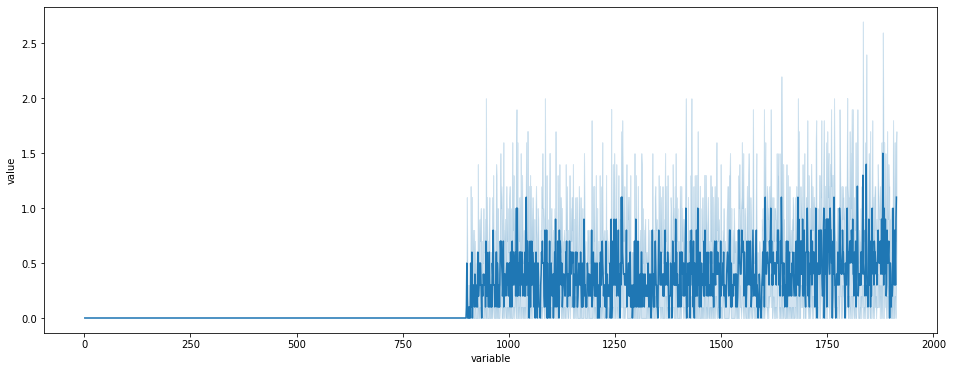

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["item_id"]=="HOBBIES_1_001"], x='variable',y='value')

In [41]:
stacked['variable'] = stacked['variable'].map(lambda x: int(x.lstrip('d_')))
stacked.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0
13,HOBBIES_1_014_CA_1_validation,HOBBIES_1_014,HOBBIES_1,HOBBIES,CA_1,CA,1,0
15244,FOODS_3_827_TX_1_validation,FOODS_3_827,FOODS_3,FOODS,TX_1,TX,1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0


In [40]:
stacked = stacked.sort_values('variable')

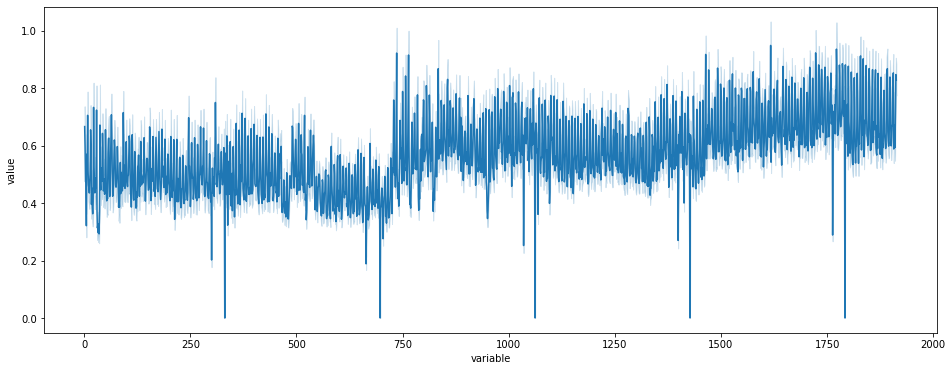

In [63]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["cat_id"]=="HOBBIES"], x='variable',y='value')

In [52]:
stacked['MA'] = stacked['variable'].rolling(window=7).mean()

In [53]:
stacked.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value,MA
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,NaN
13,HOBBIES_1_014_CA_1_validation,HOBBIES_1_014,HOBBIES_1,HOBBIES,CA_1,CA,1,0,NaN
15244,FOODS_3_827_TX_1_validation,FOODS_3_827,FOODS_3,FOODS,TX_1,TX,1,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0,NaN


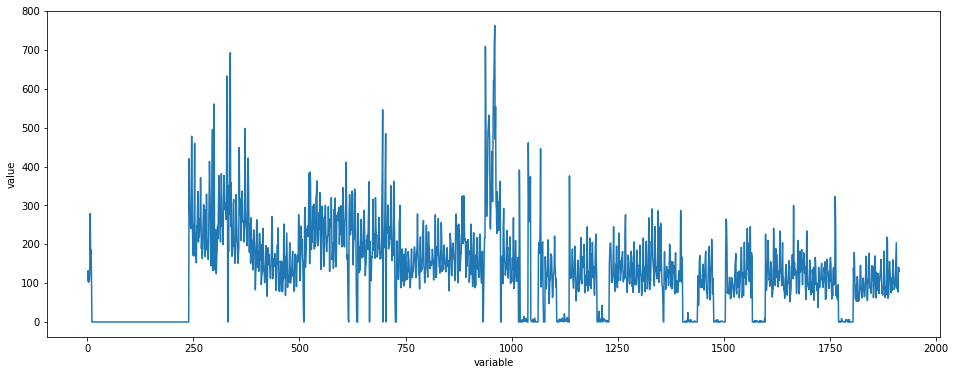

In [62]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["id"]=="FOODS_3_090_CA_3_validation"], x='variable',y='value')